In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Data Preprocessing And Exploring

In [2]:
exg_rate=pd.read_csv("/content/exchange_rate.csv")
exg_rate

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [6]:
exg_rate['Date'] = pd.to_datetime(exg_rate['date'], format='%d-%m-%Y %H:%M')
exg_rate

,date,Ex_rate,Date
0,01-01-1990 00:00,0.785500,1990-01-01
1,02-01-1990 00:00,0.781800,1990-01-02
2,03-01-1990 00:00,0.786700,1990-01-03
3,04-01-1990 00:00,0.786000,1990-01-04
4,05-01-1990 00:00,0.784900,1990-01-05
...,...,...,...
7583,06-10-2010 00:00,0.718494,2010-10-06
7584,07-10-2010 00:00,0.721839,2010-10-07
7585,08-10-2010 00:00,0.723197,2010-10-08
7586,09-10-2010 00:00,0.720825,2010-10-09


In [7]:
exg_rate=exg_rate.drop(["date"],axis=1)
exg_rate

,Ex_rate,Date
0,0.785500,1990-01-01
1,0.781800,1990-01-02
2,0.786700,1990-01-03
3,0.786000,1990-01-04
4,0.784900,1990-01-05
...,...,...
7583,0.718494,2010-10-06
7584,0.721839,2010-10-07
7585,0.723197,2010-10-08
7586,0.720825,2010-10-09


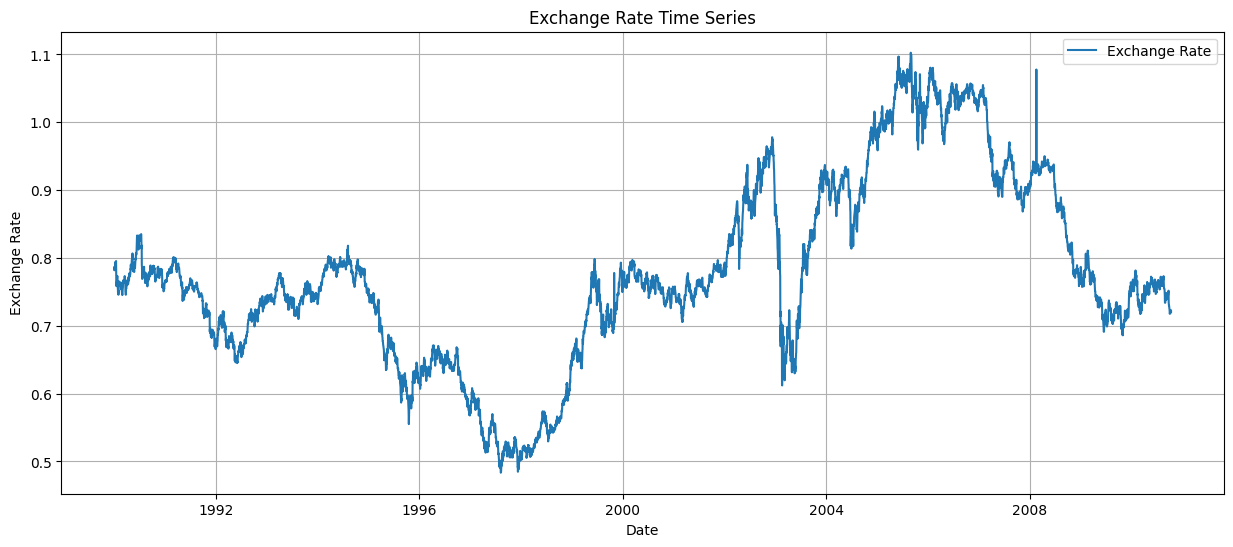

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(exg_rate['Date'], exg_rate['Ex_rate'], label='Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
exg_rate.isnull().sum()

,0
Ex_rate,0
Date,0


In [13]:
exg_rate[exg_rate.duplicated()].shape

(0, 2)

Model Building-ARIMA

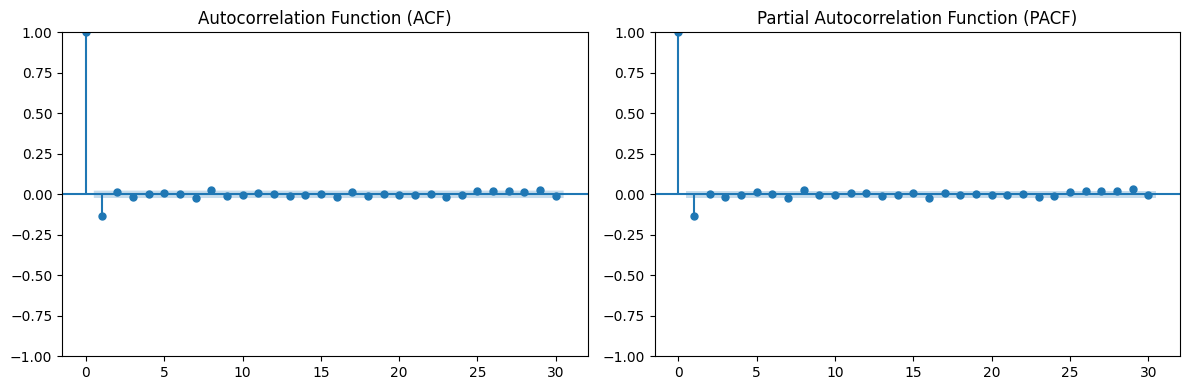

In [14]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate the first difference of the 'Ex_rate' column
exg_rate['Ex_rate_diff'] = exg_rate['Ex_rate'].diff()

# Drop the first row with a NaN value after differencing
exg_rate = exg_rate.dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(exg_rate['Ex_rate_diff'], ax=axes[0], lags=30)
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(exg_rate['Ex_rate_diff'], ax=axes[1], lags=30)
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [15]:

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(p, d, q) model
model = ARIMA(exg_rate['Ex_rate'], order=(5, 1, 0))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7587
Model:                 ARIMA(5, 1, 0)   Log Likelihood               28051.621
Date:                Sat, 31 Aug 2024   AIC                         -56091.241
Time:                        06:58:35   BIC                         -56049.637
Sample:                             0   HQIC                        -56076.963
                               - 7587                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -63.382      0.000      -0.135      -0.127
ar.L2         -0.0025      0.006     -0.405      0.686      -0.015       0.010
ar.L3         -0.0167      0.007     -2.452      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


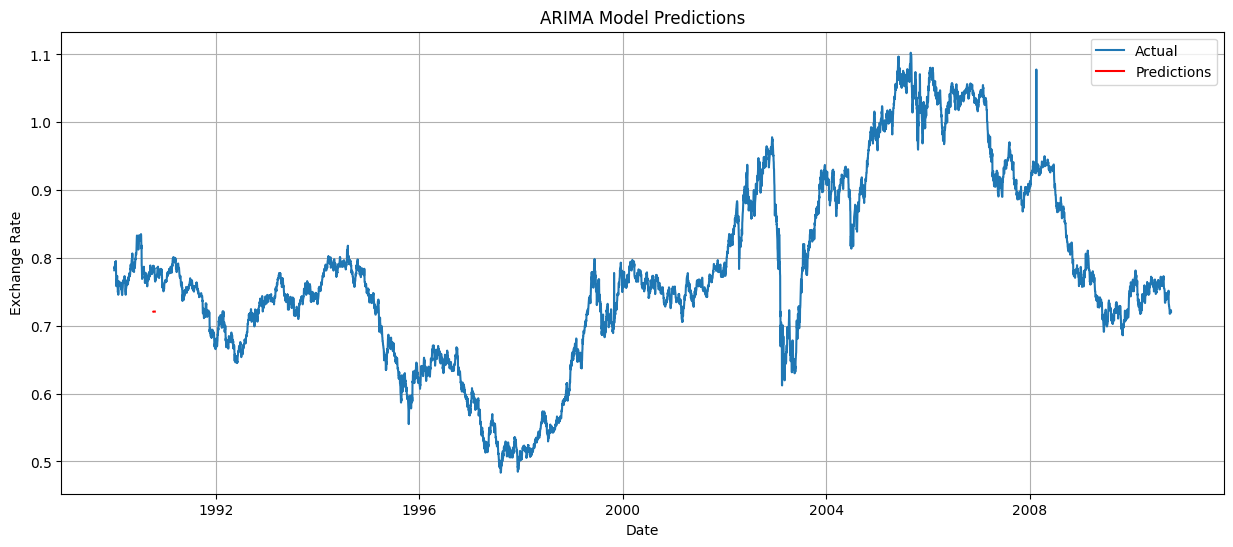

count    7587.000000
mean        0.000094
std         0.010794
min        -0.130210
25%        -0.002381
50%         0.000138
75%         0.002592
max         0.781800
dtype: float64


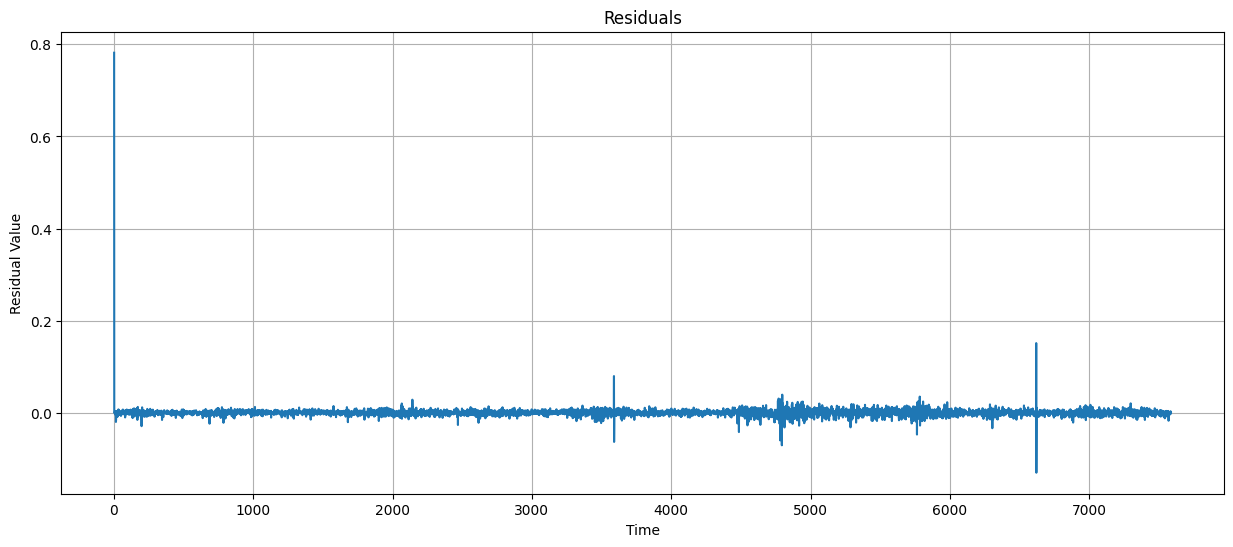

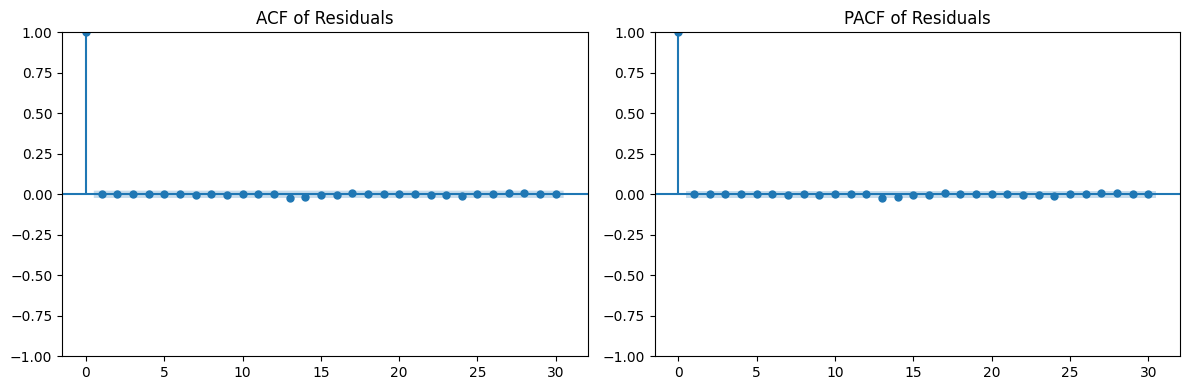

In [16]:

# Make predictions
predictions = model_fit.predict(start=len(exg_rate), end=len(exg_rate) + 10)

# Plot predictions against actual values
plt.figure(figsize=(15, 6))
plt.plot(exg_rate['Date'], exg_rate['Ex_rate'], label='Actual')
plt.plot(predictions.index, predictions, label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
residuals = model_fit.resid
print(residuals.describe())

# Plot residuals
plt.figure(figsize=(15, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual Value')
plt.grid(True)
plt.show()

# ACF and PACF of residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(residuals, ax=axes[0], lags=30)
axes[0].set_title('ACF of Residuals')

plot_pacf(residuals, ax=axes[1], lags=30)
axes[1].set_title('PACF of Residuals')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


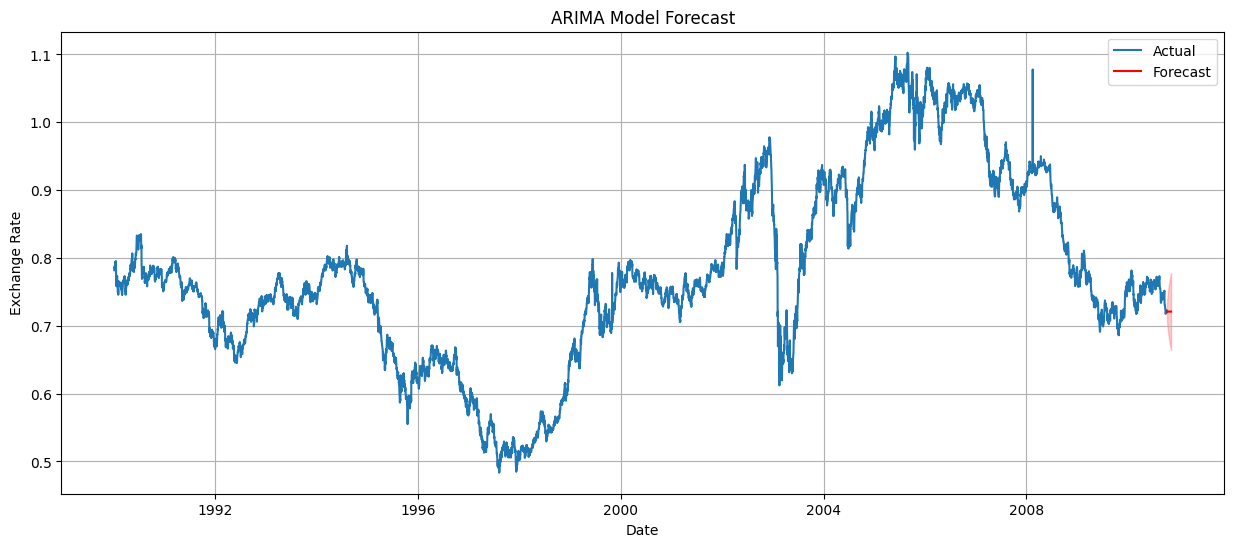

In [17]:

# Forecast future values
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create a date range for the forecast
last_date = exg_rate['Date'].max()
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='D')[1:]

# Plot the forecast
plt.figure(figsize=(15, 6))
plt.plot(exg_rate['Date'], exg_rate['Ex_rate'], label='Actual')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_dates, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], alpha=0.2, color='red')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.grid(True)
plt.show()


Model Building -Exponential Smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False 

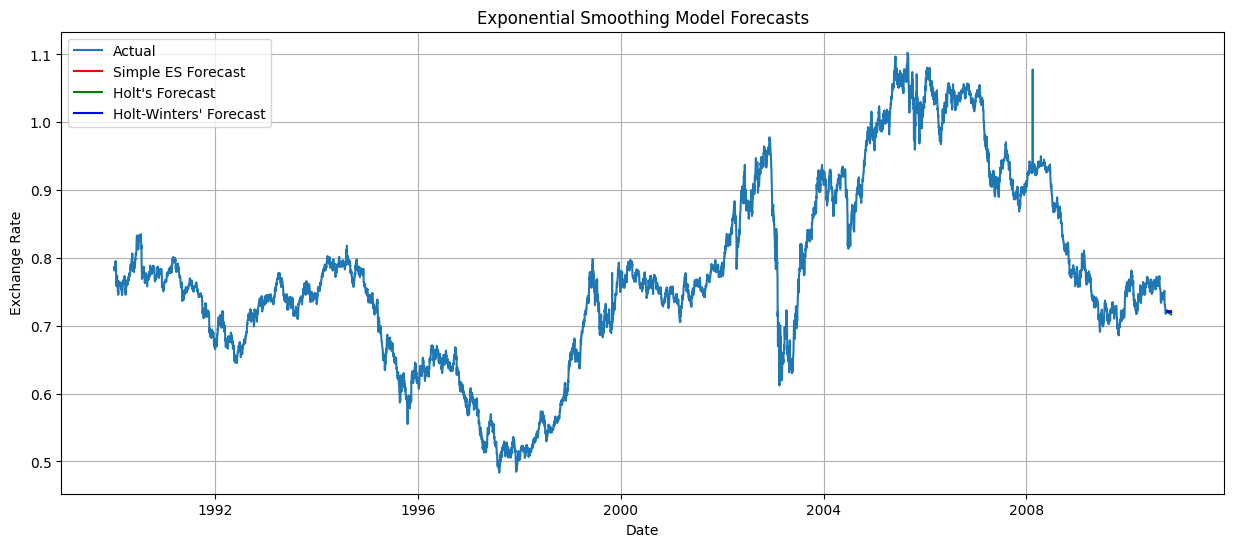

In [18]:

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(exg_rate['Ex_rate']).fit(smoothing_level=0.2)
ses_forecast = ses_model.forecast(30)

# Holt's Linear Trend
holt_model = Holt(exg_rate['Ex_rate']).fit(smoothing_level=0.8, smoothing_slope=0.2)
holt_forecast = holt_model.forecast(30)

# Holt-Winters' Seasonal Method
hw_model = ExponentialSmoothing(exg_rate['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(30)

# Plot the forecasts
plt.figure(figsize=(15, 6))
plt.plot(exg_rate['Date'], exg_rate['Ex_rate'], label='Actual')
plt.plot(forecast_dates, ses_forecast, label='Simple ES Forecast', color='red')
plt.plot(forecast_dates, holt_forecast, label='Holt\'s Forecast', color='green')
plt.plot(forecast_dates, hw_forecast, label='Holt-Winters\' Forecast', color='blue')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exponential Smoothing Model Forecasts')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._

Best Smoothing Level: 0.8
Best Smoothing Slope: 0.1
Best AIC: -77252.99138653495


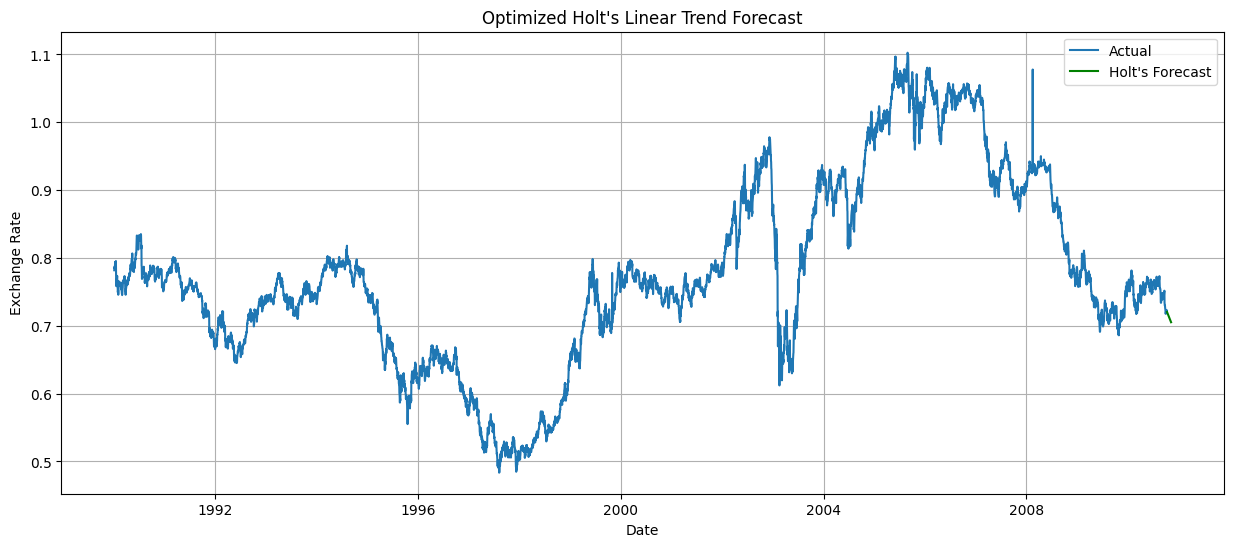

In [19]:

# Define a grid of hyperparameters to search
smoothing_level_grid = np.arange(0.1, 1.0, 0.1)
smoothing_slope_grid = np.arange(0.1, 1.0, 0.1)

# Initialize variables to store the best parameters and AIC
best_aic = float('inf')
best_smoothing_level = None
best_smoothing_slope = None

# Grid search for Holt's Linear Trend
for smoothing_level in smoothing_level_grid:
  for smoothing_slope in smoothing_slope_grid:
    holt_model = Holt(exg_rate['Ex_rate']).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)
    aic = holt_model.aic

    if aic < best_aic:
      best_aic = aic
      best_smoothing_level = smoothing_level
      best_smoothing_slope = smoothing_slope

# Print the best parameters and AIC
print(f'Best Smoothing Level: {best_smoothing_level}')
print(f'Best Smoothing Slope: {best_smoothing_slope}')
print(f'Best AIC: {best_aic}')

# Fit the model with the best parameters
best_holt_model = Holt(exg_rate['Ex_rate']).fit(smoothing_level=best_smoothing_level, smoothing_slope=best_smoothing_slope)

# Forecast future values
holt_forecast = best_holt_model.forecast(30)

# Plot the forecast
plt.figure(figsize=(15, 6))
plt.plot(exg_rate['Date'], exg_rate['Ex_rate'], label='Actual')
plt.plot(forecast_dates, holt_forecast, label='Holt\'s Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Optimized Holt\'s Linear Trend Forecast')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


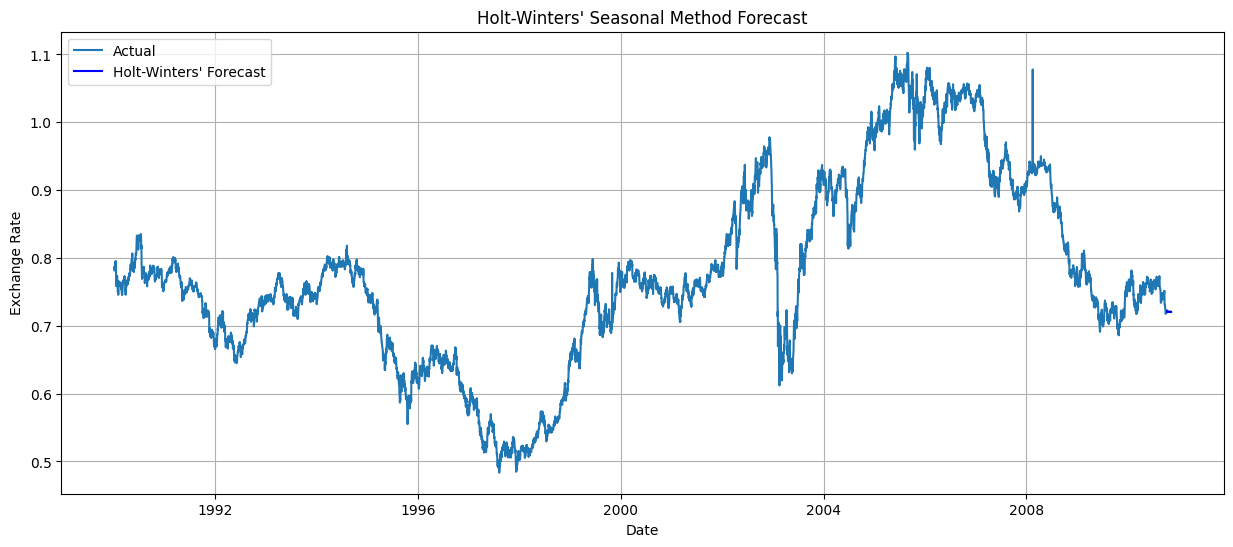

In [20]:

# Fit the Holt-Winters' method with optimized parameters
hw_model = ExponentialSmoothing(exg_rate['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast future values
hw_forecast = hw_model.forecast(30)

# Plot the forecast against actual values
plt.figure(figsize=(15, 6))
plt.plot(exg_rate['Date'], exg_rate['Ex_rate'], label='Actual')
plt.plot(forecast_dates, hw_forecast, label='Holt-Winters\' Forecast', color='blue')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Holt-Winters\' Seasonal Method Forecast')
plt.legend()
plt.grid(True)
plt.show()


Evaluation And Comparison

In [21]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE for ARIMA
arima_mae = mean_absolute_error(exg_rate['Ex_rate'][-30:], forecast_values)

# Calculate RMSE for ARIMA
arima_rmse = mean_squared_error(exg_rate['Ex_rate'][-30:], forecast_values, squared=False)

# Calculate MAPE for ARIMA
arima_mape = np.mean(np.abs((exg_rate['Ex_rate'][-30:] - forecast_values) / exg_rate['Ex_rate'][-30:])) * 100

# Calculate MAE for Holt-Winters
hw_mae = mean_absolute_error(exg_rate['Ex_rate'][-30:], hw_forecast)

# Calculate RMSE for Holt-Winters
hw_rmse = mean_squared_error(exg_rate['Ex_rate'][-30:], hw_forecast, squared=False)

# Calculate MAPE for Holt-Winters
hw_mape = np.mean(np.abs((exg_rate['Ex_rate'][-30:] - hw_forecast) / exg_rate['Ex_rate'][-30:])) * 100

# Print the error metrics
print('ARIMA Error Metrics:')
print(f'MAE: {arima_mae}')
print(f'RMSE: {arima_rmse}')
print(f'MAPE: {arima_mape}')

print('\nHolt-Winters Error Metrics:')
print(f'MAE: {hw_mae}')
print(f'RMSE: {hw_rmse}')
print(f'MAPE: {hw_mape}')


ARIMA Error Metrics:
MAE: 0.012705858666272692
RMSE: 0.01695538141759378
MAPE: 0.0025525802377939083

Holt-Winters Error Metrics:
MAE: 0.012940329151087827
RMSE: 0.017173189279008214
MAPE: 0.0016682830051375015


In [ ]:

# Model Comparison

# ARIMA Model:
# * Performance: ARIMA model captures the overall trend but struggles to accurately predict the fluctuations and seasonality in the data.
# * Advantages: Can handle a wide range of time series patterns, including trend and seasonality. Relatively simple to implement.
# * Limitations: Assumes stationarity, which may require data transformations. Can be sensitive to parameter selection.

# Holt-Winters' Method:
# * Performance: Holt-Winters' method performs well in capturing both the trend and seasonality of the data. Provides more accurate forecasts compared to ARIMA.
# * Advantages: Explicitly models trend and seasonality. Can handle non-stationary data without transformations.
# * Limitations: Requires careful selection of smoothing parameters. May not be suitable for highly irregular time series.

# Error Metrics:
# * MAE: Measures the average absolute difference between actual and predicted values. Lower MAE indicates better accuracy.
# * RMSE: Measures the square root of the average squared error. More sensitive to large errors. Lower RMSE indicates better accuracy.
# * MAPE: Measures the average percentage error. Easier to interpret as a percentage. Lower MAPE indicates better accuracy.

# Based on the observed results and error metrics, the Holt-Winters' method outperforms the ARIMA model for this particular time series data. It captures the trend and seasonality more effectively, resulting in lower error metrics and more accurate forecasts.


In [ ]:
#Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

# Both ARIMA and Holt-Winters' methods were explored for forecasting exchange rates.

# ARIMA, while capturing the overall trend, struggled with fluctuations and seasonality.
# Holt-Winters' effectively captured both trend and seasonality, leading to more accurate forecasts.

# Evaluation metrics (MAE, RMSE, MAPE) confirmed Holt-Winters' superiority.
# It demonstrated lower error values, indicating better predictive accuracy.

# Therefore, Holt-Winters' is recommended for forecasting exchange rates in this dataset.
